In [1]:
# We will use the library function to load tidyverse, tidymodels, repr, and readxl package into R. 
library(repr)
library(readxl)
library(tidyverse)
library(tidymodels)
set.seed(9999)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

# Title: Strength of knowledge level from User Knowledge Data

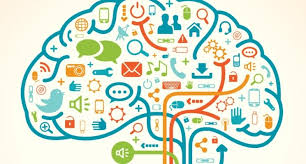
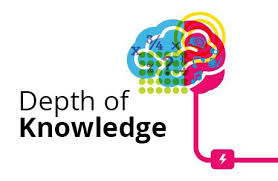


# Introduction
For our Data Science 100 group project, we will be using a dataset looking at the knowledge status of students about Electrical DC Machines and how certain predictors are associated with it. The knowledge of the students were classified by the authors through utilization of a “hybrid ML technique of k-NN and meta-heuristic exploring methods” knowledge classifier, k-nearest neighbor algorithm. Various attributes and predictors were taken into account when making their dataset, looking at study time, repetition, exam performance, and of course, the user knowledge. The knowledge classifier measures the distance between students depending on their data and the value of their knowledge weights. The dissimilarities go into determining their knowledge class.

# Question
How strongly is knowledge level associated with study time, repetition, and exam performance?

# The Dataset
The dataset we use is downloaded from this link (https://archive.ics.uci.edu/ml/machine-learning-databases/00257/Data_User_Modeling_Dataset_Hamdi%20Tolga%20KAHRAMAN.xls), and it’s in sheet 2 ("Training Data").

Since it is untidy data, we can use the “select” function to delete the description, and the remaining data will be tidy.

# Methods & Results:

After visualizing the histogram of each variable which is colored by UNS(The knowledge level of the users). We choose the following variables, we can create a KNN classification model to predict user knowledge level.
- UNS (The knowledge level of user)
- PEG (The exam performance of user for goal objects)

The KNN classification model will need to be trained, evaluated, and tuned with training and testing sets before predicting the knowledge level of users. Comparing the histogram of each variable, Figure 5(PEG Distribution) has less overlap with each knowledge level, which means that PEG has a stronger relevance with UNS compared to other variables. Therefore, the PEG variable will be the useful predictor we are using to do a more effective model.

How to visualize: One way we will visualize the results would be through utilization of a histogram. This will help us to analyze the predictors that are relevant to the knowledge of the users by visualizing the distribution of the effects of the predictors on the knowledge level.

Attribute Information: 

Some abbreviations we will use for our information.

STG: (The degree of study time for goal object materails)

SCG: (The degree of repetition number of user for goal object materails)

STR: (The degree of study time of user for related objects with goal object)

LPR: (The exam performance of user for related objects with goal object)

PEG: (The exam performance of user for goal objects)

UNS: (The knowledge level of user)

The begin with our data analysis, we will use the dataset we use is downloaded from this link: `https://archive.ics.uci.edu/ml/machine-learning-databases/00257/Data_User_Modeling_Dataset_Hamdi%20Tolga%20KAHRAMAN.xls`. 

We can see that it’s already spilt our data into training set and testing set at proportion about 65% to 35%. As the data contain the unwanted attribute information, we created two new excel docs without attribute information for training and testing in `.csv` format. Then we use `read_csv` function to read the training and testing data sets as `user_knowledge_training` and `user_knowledge_testing`.

### Read and split our data

In [2]:
# read the training data from URL make the data reproducible

UNS_lkup <- c("very_low" = "very_low", "High"="High", "Low"="Low", "Middle"="Middle")
UNS_lkup_1 <- c("Very Low" = "very_low", "High"="High", "Low"="Low", "Middle"="Middle")
user_knowledge_training_1 <- read_csv("https://github.com/DennisZzz/DSCI100/raw/main/Data_User_Modeling_Dataset_Hamdi%20Tolga%20KAHRAMAN.csv")
user_knowledge_training_1$UNS <- as.character(UNS_lkup[user_knowledge_training_1$UNS])
user_knowledge_training <- user_knowledge_training_1|>
    mutate(UNS=as_factor(UNS))
user_knowledge_training
# read the testing data from URL make the data reproducible
user_knowledge_testing <- read_csv("https://github.com/DennisZzz/DSCI100/raw/main/Data_User_Modeling_Dataset_Hamdi%20Tolga%20KAHRAMAN_testing.csv")
user_knowledge_testing$UNS <- as.character(UNS_lkup_1[user_knowledge_testing$UNS])
user_knowledge_testing <- user_knowledge_testing|>
    mutate(UNS=as_factor(UNS))
user_knowledge_testing

Rows: 258 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): UNS
dbl (5): STG, SCG, STR, LPR, PEG

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.00,0.000,0.00,0.00,0.00,very_low
0.08,0.080,0.10,0.24,0.90,High
0.06,0.060,0.05,0.25,0.33,Low
0.10,0.100,0.15,0.65,0.30,Middle
0.08,0.080,0.08,0.98,0.24,Low
0.09,0.150,0.40,0.10,0.66,Middle
0.10,0.100,0.43,0.29,0.56,Middle
0.15,0.020,0.34,0.40,0.01,very_low
0.20,0.140,0.35,0.72,0.25,Low


Rows: 145 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): UNS
dbl (5): STG, SCG, STR, LPR, PEG

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.00,0.10,0.50,0.26,0.05,very_low
0.05,0.05,0.55,0.60,0.14,Low
0.08,0.18,0.63,0.60,0.85,High
0.20,0.20,0.68,0.67,0.85,High
0.22,0.22,0.90,0.30,0.90,High
0.14,0.14,0.70,0.50,0.30,Low
0.16,0.16,0.80,0.50,0.50,Middle
0.12,0.12,0.75,0.68,0.15,Low
0.20,0.20,0.88,0.77,0.80,High


After get both training and testing data sets, we start by training summarize of training data. 

We first get the summarization called `user_summary` for each user knowledge level `UNS`  by using `group_by` and `summarize` function. The data we use is training data set `user_knowledge_training`.

In [3]:
user_summary <- user_knowledge_training |>
    group_by(UNS)|>
    summarize (mean_of_STG = mean(STG),
               mean_of_SCG = mean(SCG),
               mean_of_LPR = mean(LPR),
               number_of_UNS = n())
user_summary

UNS,mean_of_STG,mean_of_SCG,mean_of_LPR,number_of_UNS
<fct>,<dbl>,<dbl>,<dbl>,<int>
very_low,0.3057917,0.1981250,0.3587500,24
High,0.4216508,0.4231905,0.5012698,63
Low,0.3211446,0.3370000,0.4973494,83
Middle,0.3999773,0.3679205,0.3428409,88


Now we use `ggplot` function on `user_knowledge_training` to get histograms which represent the distribution between each column and `UNS`. 

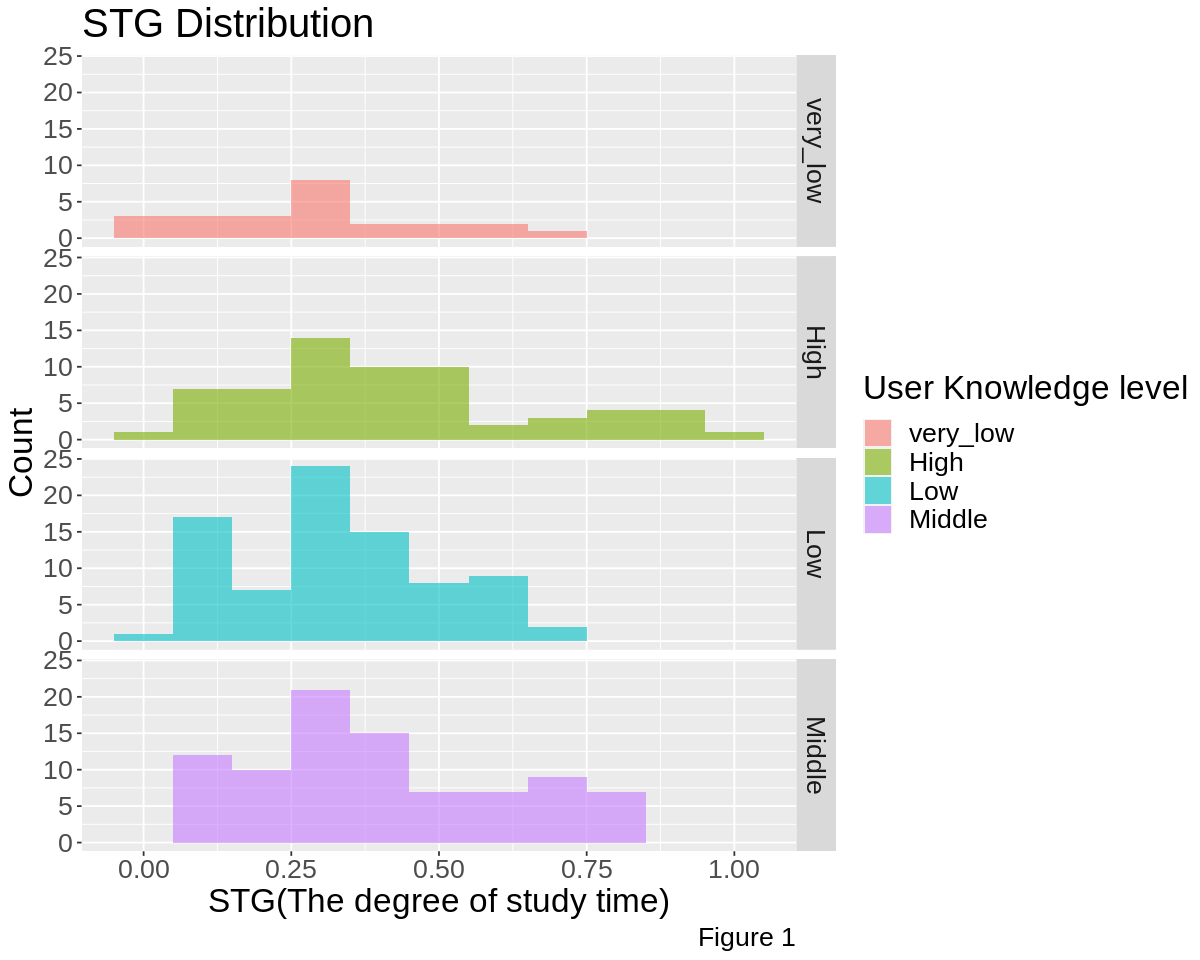

In [4]:
options(repr.plot.width = 10, repr.plot.height = 8)
STG_vs_UNS_hist <- user_knowledge_training|>
    ggplot(aes(x=STG, fill=UNS))+
    geom_histogram(bins=45, alpha=0.6, position="identity", binwidth = 0.1)+
    labs(x="STG(The degree of study time)", y="Count", title = "STG Distribution", caption="Figure 1", fill = "User Knowledge level")+
    theme(text = element_text(size = 20))+
    facet_grid(rows = vars(UNS))
STG_vs_UNS_hist

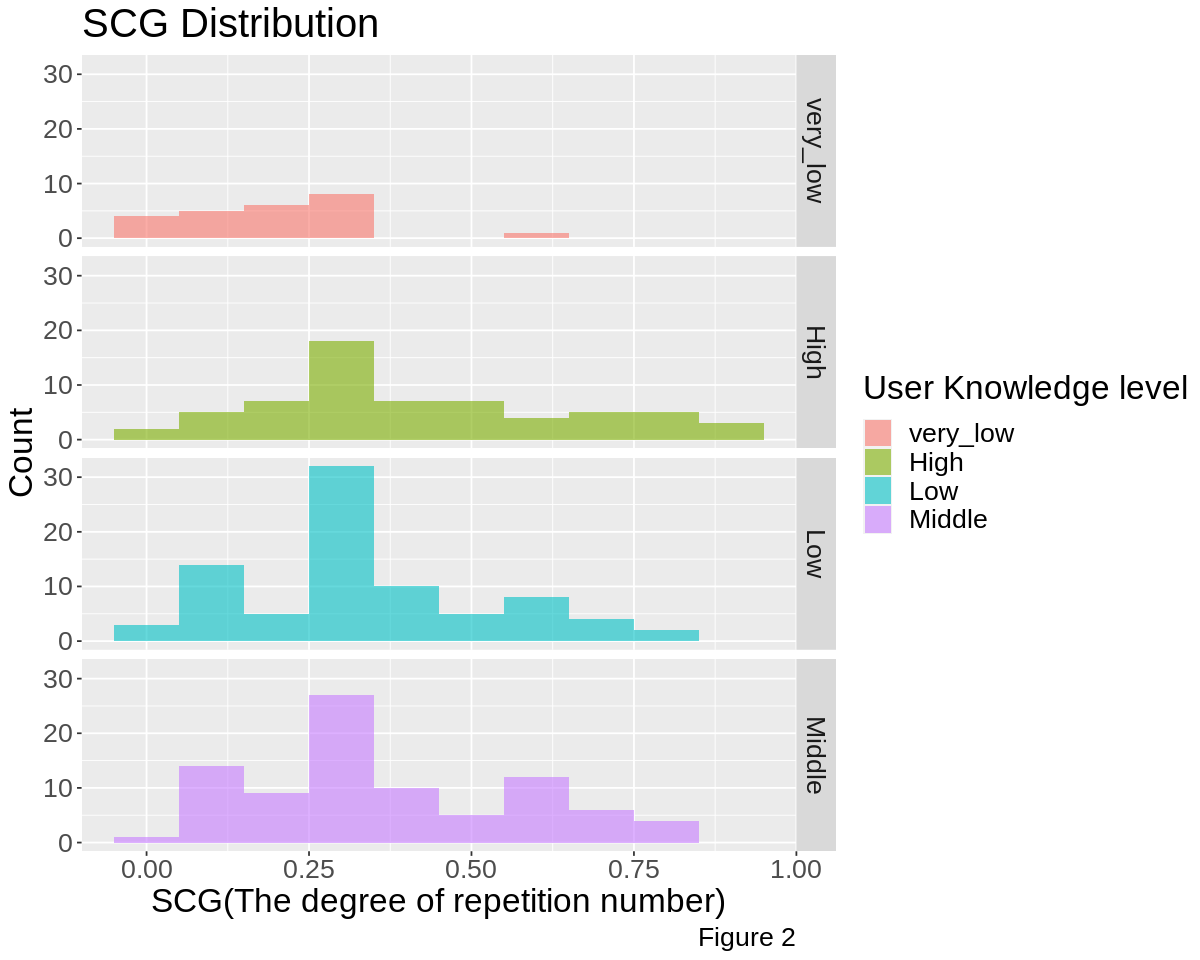

In [5]:
options(repr.plot.width = 10, repr.plot.height = 8)
SCG_hist <- user_knowledge_training|>
    ggplot(aes(x=SCG, fill=UNS))+
    geom_histogram(bins=45, alpha=0.6, position="identity", binwidth = 0.1)+
    labs(x="SCG(The degree of repetition number)", y="Count", title = "SCG Distribution", caption="Figure 2", fill = "User Knowledge level")+
    theme(text = element_text(size = 20))+
    facet_grid(rows = vars(UNS))
SCG_hist

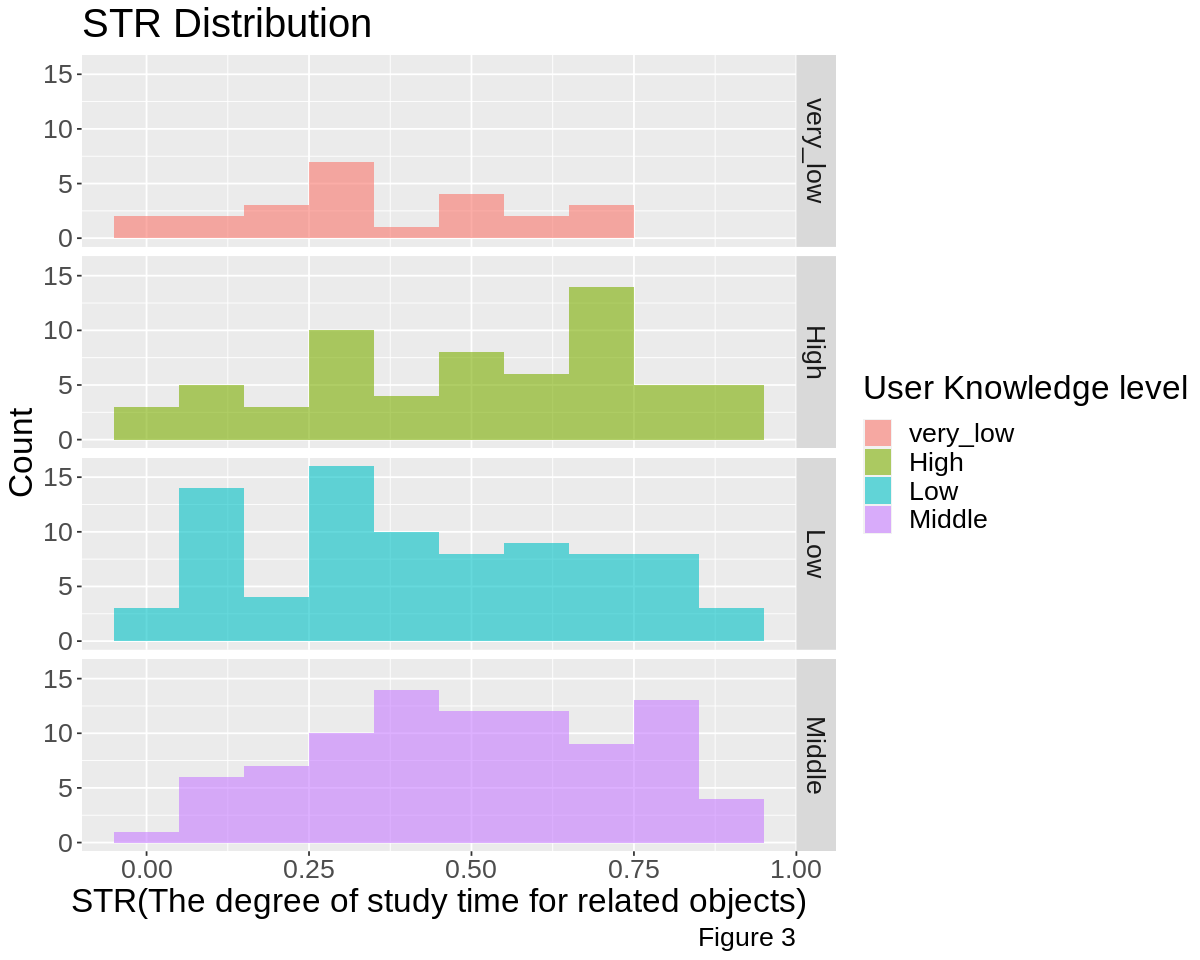

In [6]:
options(repr.plot.width = 10, repr.plot.height = 8)
STR_hist <- user_knowledge_training|>
    ggplot(aes(x=STR, fill=UNS))+
    geom_histogram(bins=45, alpha=0.6, position="identity", binwidth = 0.1)+
    labs(x="STR(The degree of study time for related objects)", y="Count", title = "STR Distribution", caption="Figure 3", fill = "User Knowledge level")+
    theme(text = element_text(size = 20))+
    facet_grid(rows = vars(UNS))
STR_hist

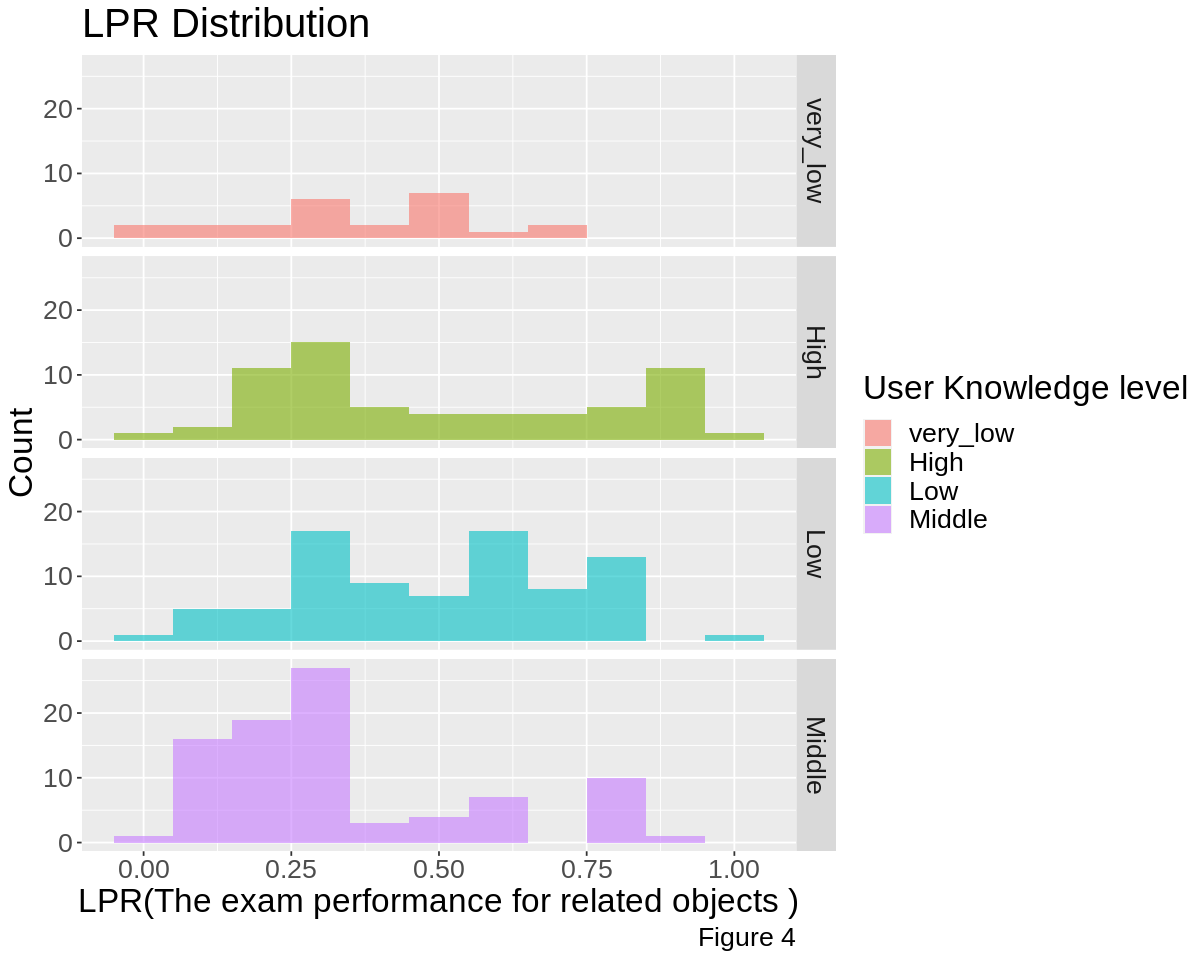

In [7]:
options(repr.plot.width = 10, repr.plot.height = 8)
LPR_hist <- user_knowledge_training|>
    ggplot(aes(x=LPR, fill=UNS))+
    geom_histogram(bins=45, alpha=0.6, position="identity", binwidth = 0.1)+
    labs(x="LPR(The exam performance for related objects )", y="Count", title = "LPR Distribution", caption="Figure 4", fill = "User Knowledge level")+
    theme(text = element_text(size = 20))+
    facet_grid(rows = vars(UNS))
LPR_hist

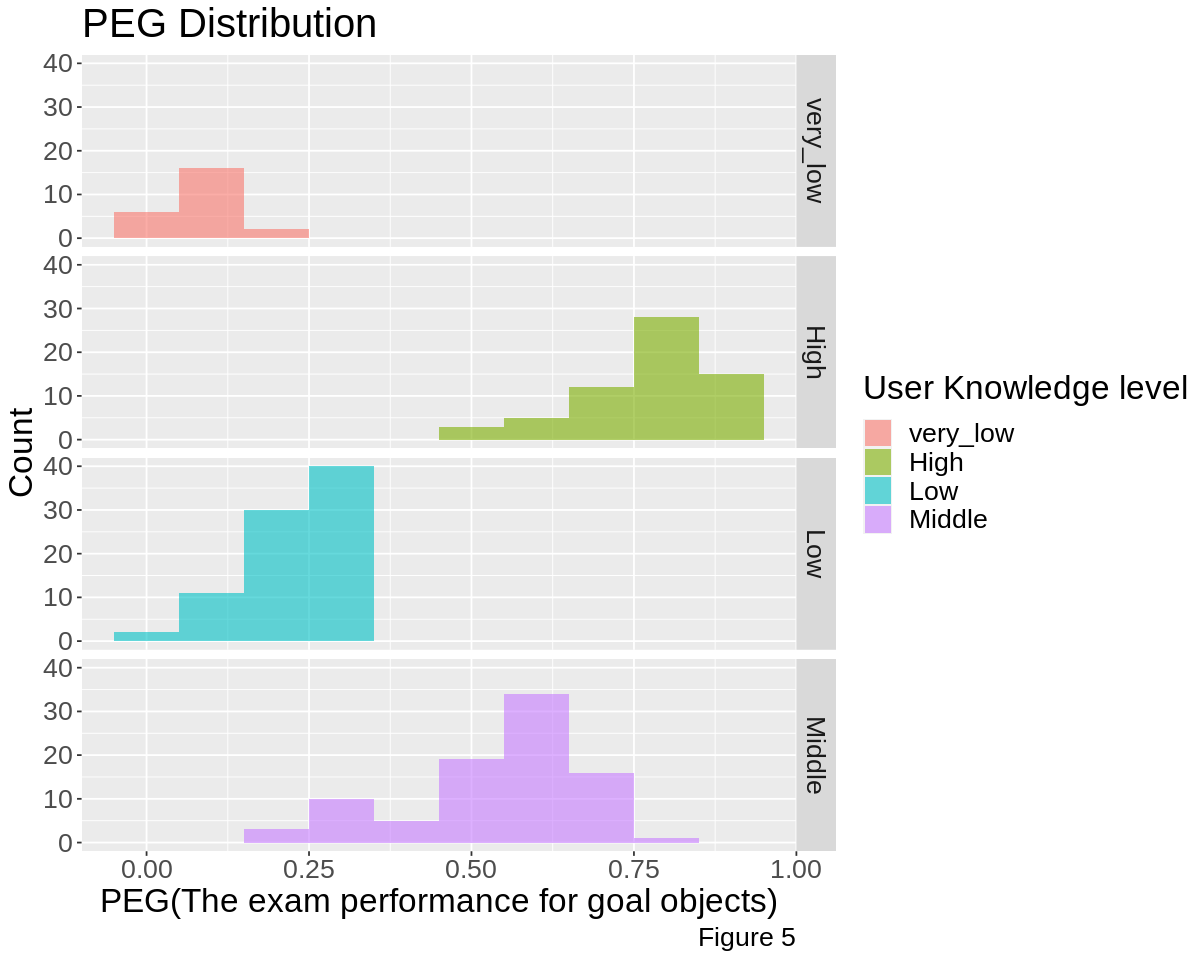

In [8]:
options(repr.plot.width = 10, repr.plot.height = 8)
PEG_hist <- user_knowledge_training|>
    ggplot(aes(x=PEG, fill=UNS))+
    geom_histogram(bins=45, alpha=0.6, position="identity", binwidth = 0.1)+
    labs(x="PEG(The exam performance for goal objects)", y="Count", title = "PEG Distribution", caption="Figure 5", fill = "User Knowledge level")+
    theme(text = element_text(size = 20))+
    facet_grid(rows = vars(UNS))
PEG_hist

By comparing the above five histograms, we find that PEG and UNS seem to have a greater correlation. Because in PEG histograms, the distributions of different user knowledge levels have less overlap than those of other variables. Although PEG has better performance, there is still some overlap between different user knowledge levels. Therefore, to find better predictors, we will try different combinations of variables to find predictors with higher accuracy.

### Finding a good subset of predictors

In [9]:
set.seed(9999)
user_knowledge_subset <- user_knowledge_training

names <- colnames(user_knowledge_subset |> select(-UNS))

example_formula <- paste("UNS", "~", paste(names, collapse="+"))
example_formula

# create an empty tibble to store the results
accuracies <- tibble(size = integer(), 
                     model_string = character(), 
                     accuracy = numeric())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
     set_engine("kknn") |>
     set_mode("classification")

user_knowledge_vfold <- vfold_cv(user_knowledge_subset, v = 5, strata = UNS)

n_total <- length(names)

selected <- c()

# for every size from 1 to the total number of predictors
for (i in 1:n_total) {
    # for every predictor still not added yet
    accs <- list()
    models <- list()
    for (j in 1:length(names)) {
        # create a model string for this combination of predictors
        preds_new <- c(selected, names[[j]])
        model_string <- paste("UNS", "~", paste(preds_new, collapse="+"))

        # create a recipe from the model string
        user_knowledge_subset_recipe <- recipe(as.formula(model_string), 
                                data = user_knowledge_subset) |>
                          step_scale(all_predictors()) |>
                          step_center(all_predictors())

        # tune the KNN classifier with these predictors, 
        # and collect the accuracy for the best K
        acc <- workflow() |>
          add_recipe(user_knowledge_subset_recipe) |>
          add_model(knn_spec) |>
          tune_grid(resamples = user_knowledge_vfold, grid = 10) |>
          collect_metrics() |>
          filter(.metric == "accuracy") |>
          summarize(mx = max(mean))
        acc <- acc$mx |> unlist()

        # add this result to the dataframe
        accs[[j]] <- acc
        models[[j]] <- model_string}
    jstar <- which.max(unlist(accs))
    accuracies <- accuracies |> 
      add_row(size = i, 
              model_string = models[[jstar]], 
              accuracy = accs[[jstar]])
    selected <- c(selected, names[[jstar]])
    names <- names[-jstar]}
accuracies

[1] "UNS ~ STG+SCG+STR+LPR+PEG"

size,model_string,accuracy
<int>,<chr>,<dbl>
1,UNS ~ PEG,0.8406679
2,UNS ~ PEG+LPR,0.9576082
3,UNS ~ PEG+LPR+SCG,0.9497592
4,UNS ~ PEG+LPR+SCG+STG,0.8879047
5,UNS ~ PEG+LPR+SCG+STG+STR,0.8138264


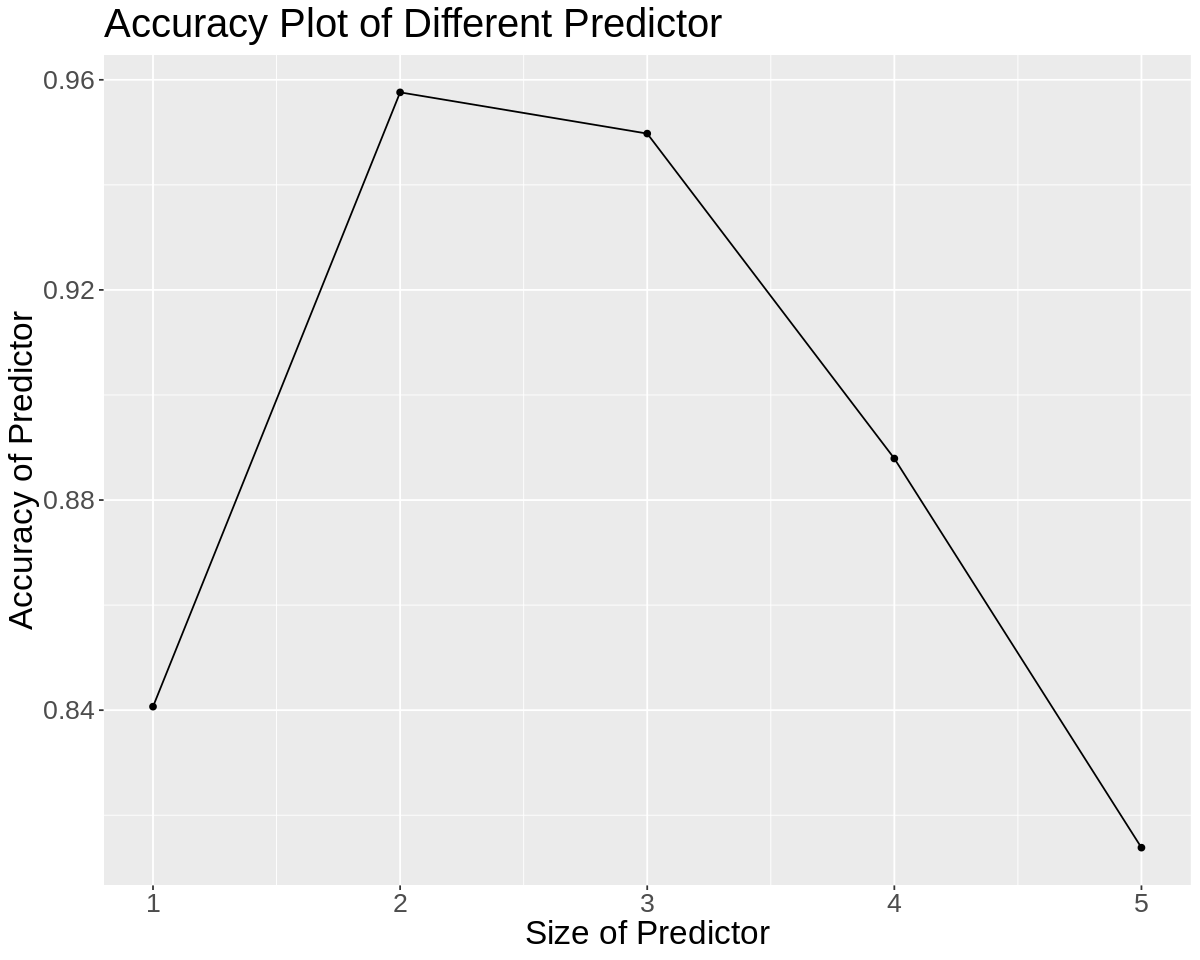

In [10]:
set.seed(1)
predictor_plot <- accuracies |>
    ggplot(aes(x=size,y=accuracy))+
    geom_point()+
    geom_line()+
    labs(x="Size of Predictor", y="Accuracy of Predictor", title="Accuracy Plot of Different Predictor")+
    theme(text = element_text(size = 20))
predictor_plot

From the plot above, we choose PEG+LPR as our predictors to create KNN classification model to predict user knowledge level. Because PEG+LPR has highest accuracy compare with other predictors with the accuracy 0.953.

### Find the best k we will use

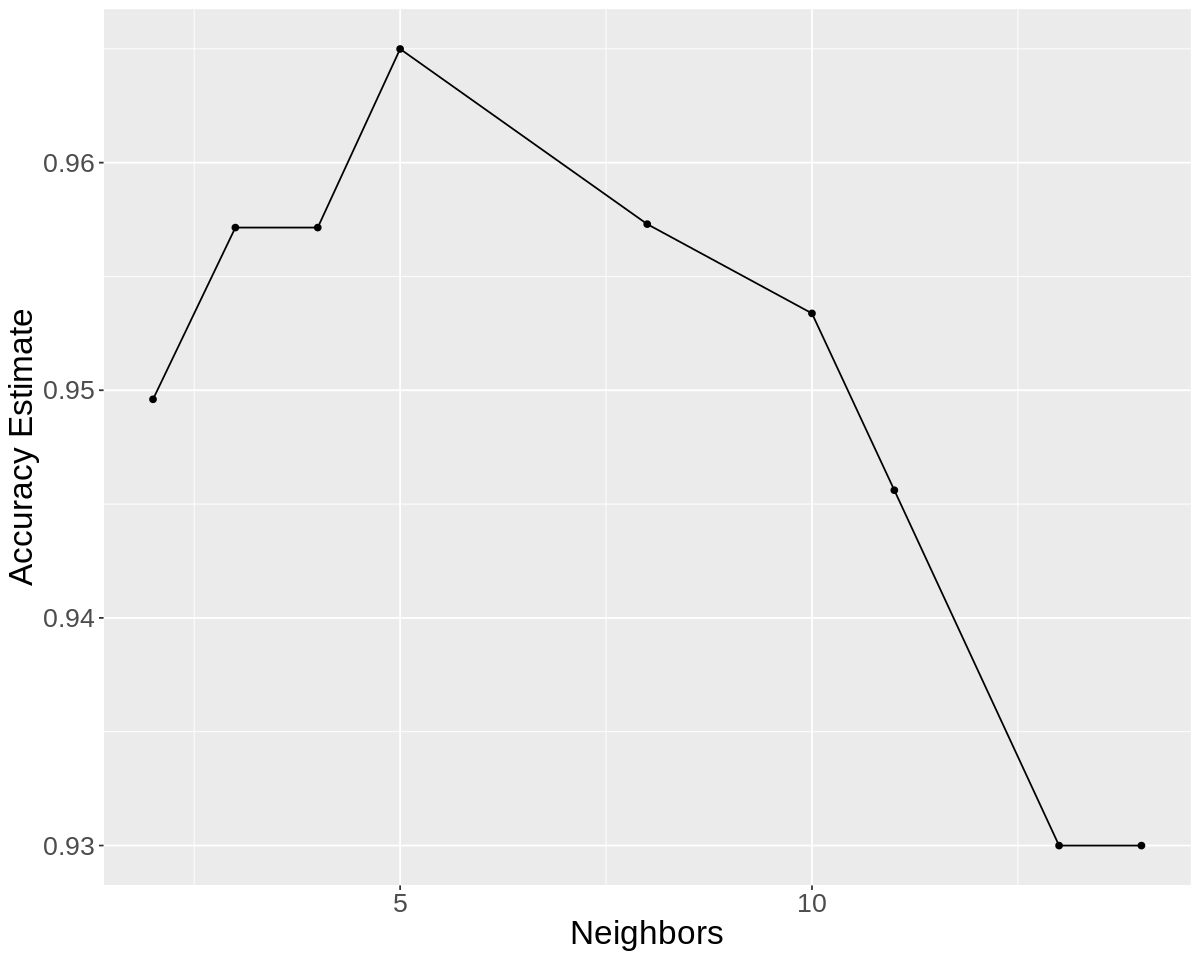

In [11]:
set.seed(9999)
#Choose the best k for PEG+LPR as predictor

user_knowledge_recipe <- recipe(UNS~PEG+LPR, data=user_knowledge_training)|>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

knn_tune <-  nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
     set_engine("kknn") |>
     set_mode("classification")

data_vfold <- vfold_cv(user_knowledge_training, v = 5, strata = UNS)

user_knowledge_resample_fit <- workflow() |>
     add_recipe(user_knowledge_recipe) |>
     add_model(knn_tune) |>
     tune_grid(resamples = data_vfold, grid=10)|>
     collect_metrics()

user_knowledge_accuracies <- user_knowledge_resample_fit |> 
     filter(.metric == "accuracy")

cross_val_plot <- user_knowledge_accuracies |>
     ggplot(aes(x=neighbors, y=mean)) +
     geom_point()+
     geom_line() +
     labs(x = "Neighbors", y = "Accuracy Estimate")+
     theme(text = element_text(size = 20))
 cross_val_plot

We would choose k=5. Because in this plot the point k=5 has the highest value of accurate estimate compared to other points.

### Build the knn classification model with k=5

In [12]:
set.seed(9999)
user_knowledge_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 5) |>
    set_engine("kknn") |>
    set_mode("classification")

user_knowledge_recipe <- recipe(UNS~PEG+LPR, data=user_knowledge_training)|>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

user_knowledge_fit <- workflow() |>
    add_recipe(user_knowledge_recipe) |>
    add_model(user_knowledge_spec) |>
    fit(data = user_knowledge_training)

user_knowledge_predictions <- predict(user_knowledge_fit, user_knowledge_testing) |>
    bind_cols(user_knowledge_testing)
user_knowledge_predictions

user_knowledge_metrics <- user_knowledge_predictions|>
    metrics(truth =UNS, estimate = .pred_class)
user_knowledge_metrics

user_knowledge_conf_mat <- user_knowledge_predictions |>
    conf_mat(truth =UNS, estimate = .pred_class)
user_knowledge_conf_mat

.pred_class,STG,SCG,STR,LPR,PEG,UNS
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
very_low,0.00,0.10,0.50,0.26,0.05,very_low
Low,0.05,0.05,0.55,0.60,0.14,Low
High,0.08,0.18,0.63,0.60,0.85,High
High,0.20,0.20,0.68,0.67,0.85,High
High,0.22,0.22,0.90,0.30,0.90,High
Low,0.14,0.14,0.70,0.50,0.30,Low
Middle,0.16,0.16,0.80,0.50,0.50,Middle
Low,0.12,0.12,0.75,0.68,0.15,Low
High,0.20,0.20,0.88,0.77,0.80,High


ERROR: [1m[33mError[39m in [1m[1m`value[[3L]]()`:[22m
[33m![39m In metric: `accuracy`
[1m[22mProblem while computing `.estimate = metric_fn(truth = UNS, estimate =
.pred_class, na_rm = na_rm)`.
[1mCaused by error in [1m[1m`multiclass_checks()`:[22m
[33m![39m `truth` and `estimate` levels must be equivalent.
`truth`: very_low, Low, High, Middle
`estimate`: very_low, High, Low, Middle


# Expected Outcomes and significance
### Expect to find
- Given the user knowledge data, we have the expectation of determining the most effective predictor in the students’ knowledge on Electrical DC Machines when tested.
### Impact of findings
- The impact of our findings is that we determine the predictor that best correlates with students’ knowledge. We can use this information to apply to areas of study other than solely Electrical DC Machines.
### Future questions
- Future questions could look at different predictors and their effect on user knowledge when examined on Electrical DC Machines. Different predictors include those not within this particular data set. For example, how strongly is room temperature associated with user knowledge when conducting the same study methods?